In [ ]:
import os
import tarfile
from six.moves import urllib

root = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
path = os.path.join("datasets", "housing")
source = root + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=source, path=path):
    if not os.path.isdir(path):
        os.makedirs(path)
    tgz_path = os.path.join(path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=path)
    housing_tgz.close()

In [ ]:
import pandas as pd
import seaborn as sb
import csv

In [ ]:
#df=pd.read_csv("/content/drive/MyDrive/housing.csv")
#df=pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')
#df=pd.read_csv(r"https://github.com/sonarsushant/California-House-Price-Prediction/blob/master/housing.csv")
fetch_housing_data()

In [ ]:
import pandas as pd

def load_data(housing_path=path):
    csv = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv)

In [ ]:
#df.head(10)
housing = load_data() #--> loading the data set 
housing.head() #-->Storeing the given dataset in housing and loaded the dataset using a function.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.shape #-->Checking the number rows and columns 

(20640, 10)

In [ ]:
housing.isnull().sum() #--> checking the missing values in housing dataset

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
#--> We homsave got 207 null values in total_bedro and going to handle null values by filling mean values


  Encoding the ocean_proximity non numerical to numerical values for further enchancement.

In [ ]:
from pandas.core.reshape.reshape import get_dummies
status=pd.get_dummies(housing['ocean_proximity'])

In [ ]:
housing=pd.concat([housing,status],axis=1)
housing=housing.drop(columns='ocean_proximity',axis=1)

In [ ]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
<1H OCEAN               0
INLAND                  0
ISLAND                  0
NEAR BAY                0
NEAR OCEAN              0
dtype: int64

In [ ]:
housing['total_bedrooms'].fillna(value=housing['total_bedrooms'].mean(),inplace=True)

In [ ]:
#--> The 207 null values in total_bedroom has been handled and return to 0

In [ ]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

In [ ]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,0,0,0,1,0


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   <1H OCEAN           20640 non-null  uint8  
 10  INLAND              20640 non-null  uint8  
 11  ISLAND              20640 non-null  uint8  
 12  NEAR BAY            20640 non-null  uint8  
 13  NEAR OCEAN          20640 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 1.5 MB


In [ ]:
housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,0.018220,-0.006433,-0.004361,-0.019785,0.000676
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018220,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,0.442636,0.317393,0.000242,0.110950,0.128779
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874,0.496710,0.465473,0.015563,0.314077,0.334963
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbcb3449190>,
      dtype=object)

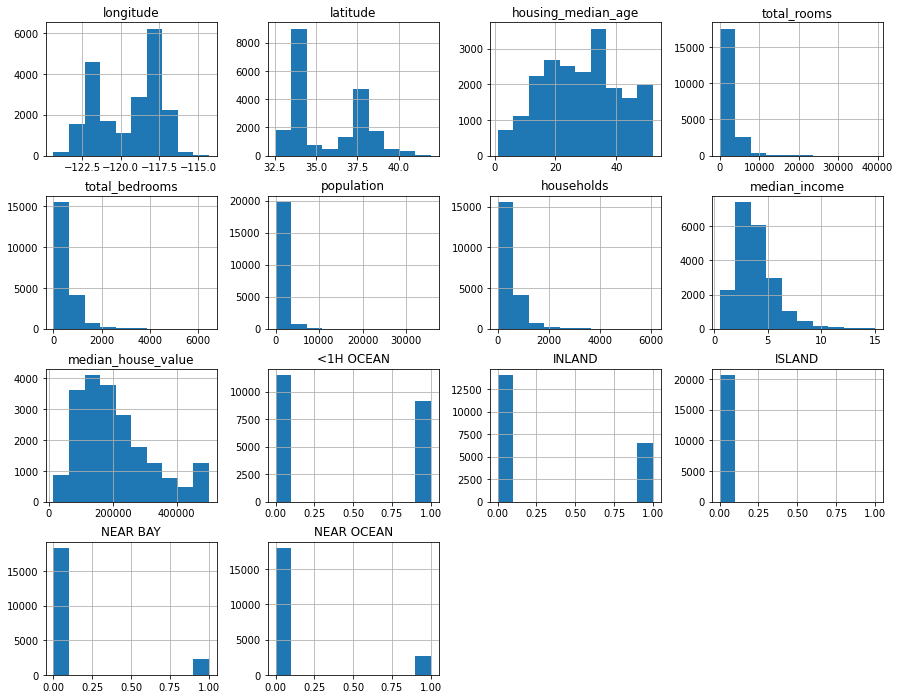

In [ ]:
housing.hist(bins=10,figsize=(15,12))

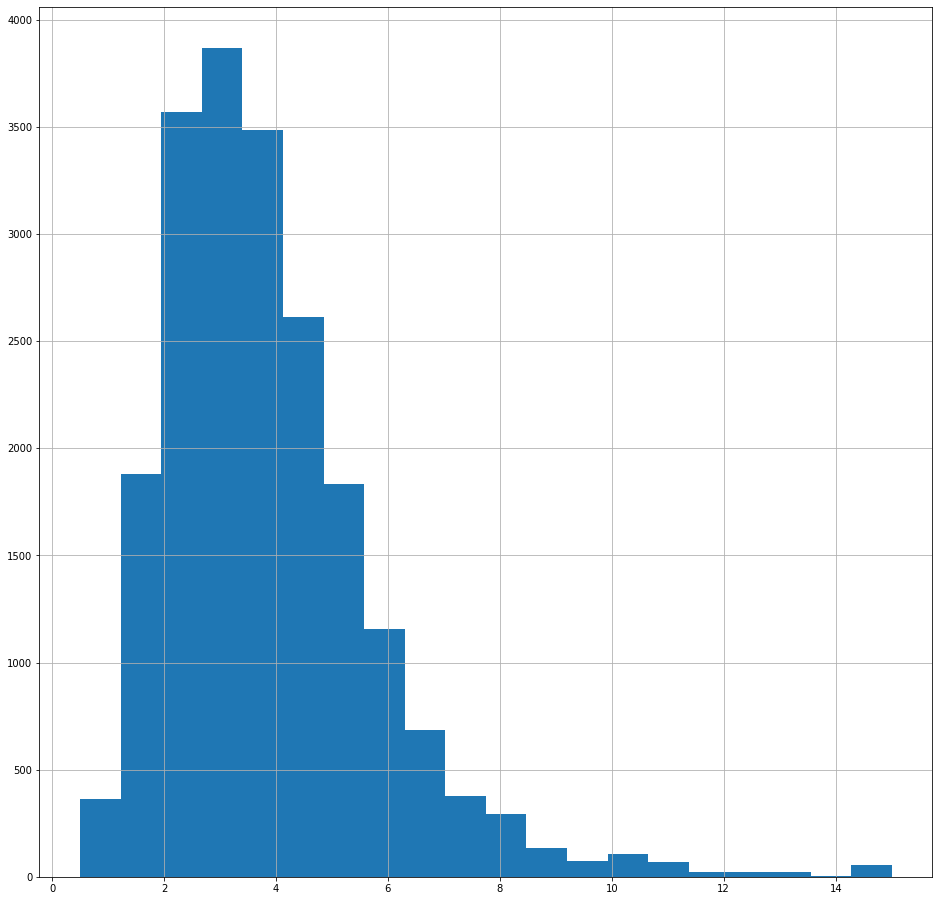

In [ ]:
housing['median_income'].hist(bins=20,figsize=(16,16))

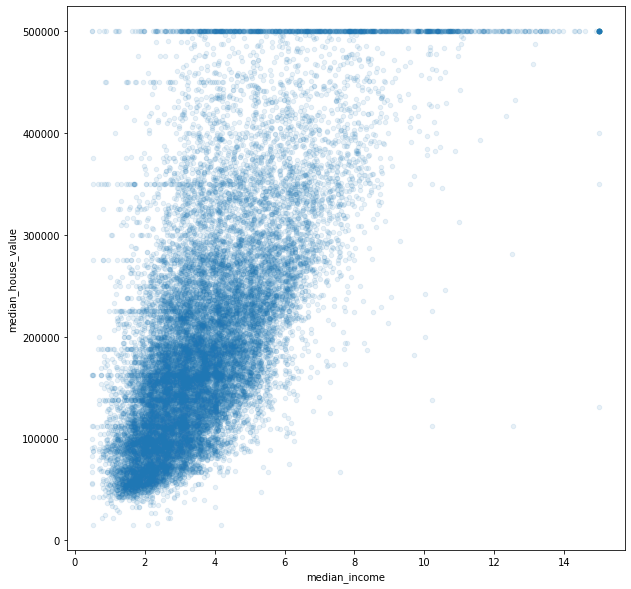

In [ ]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=.1,figsize=(10,10))

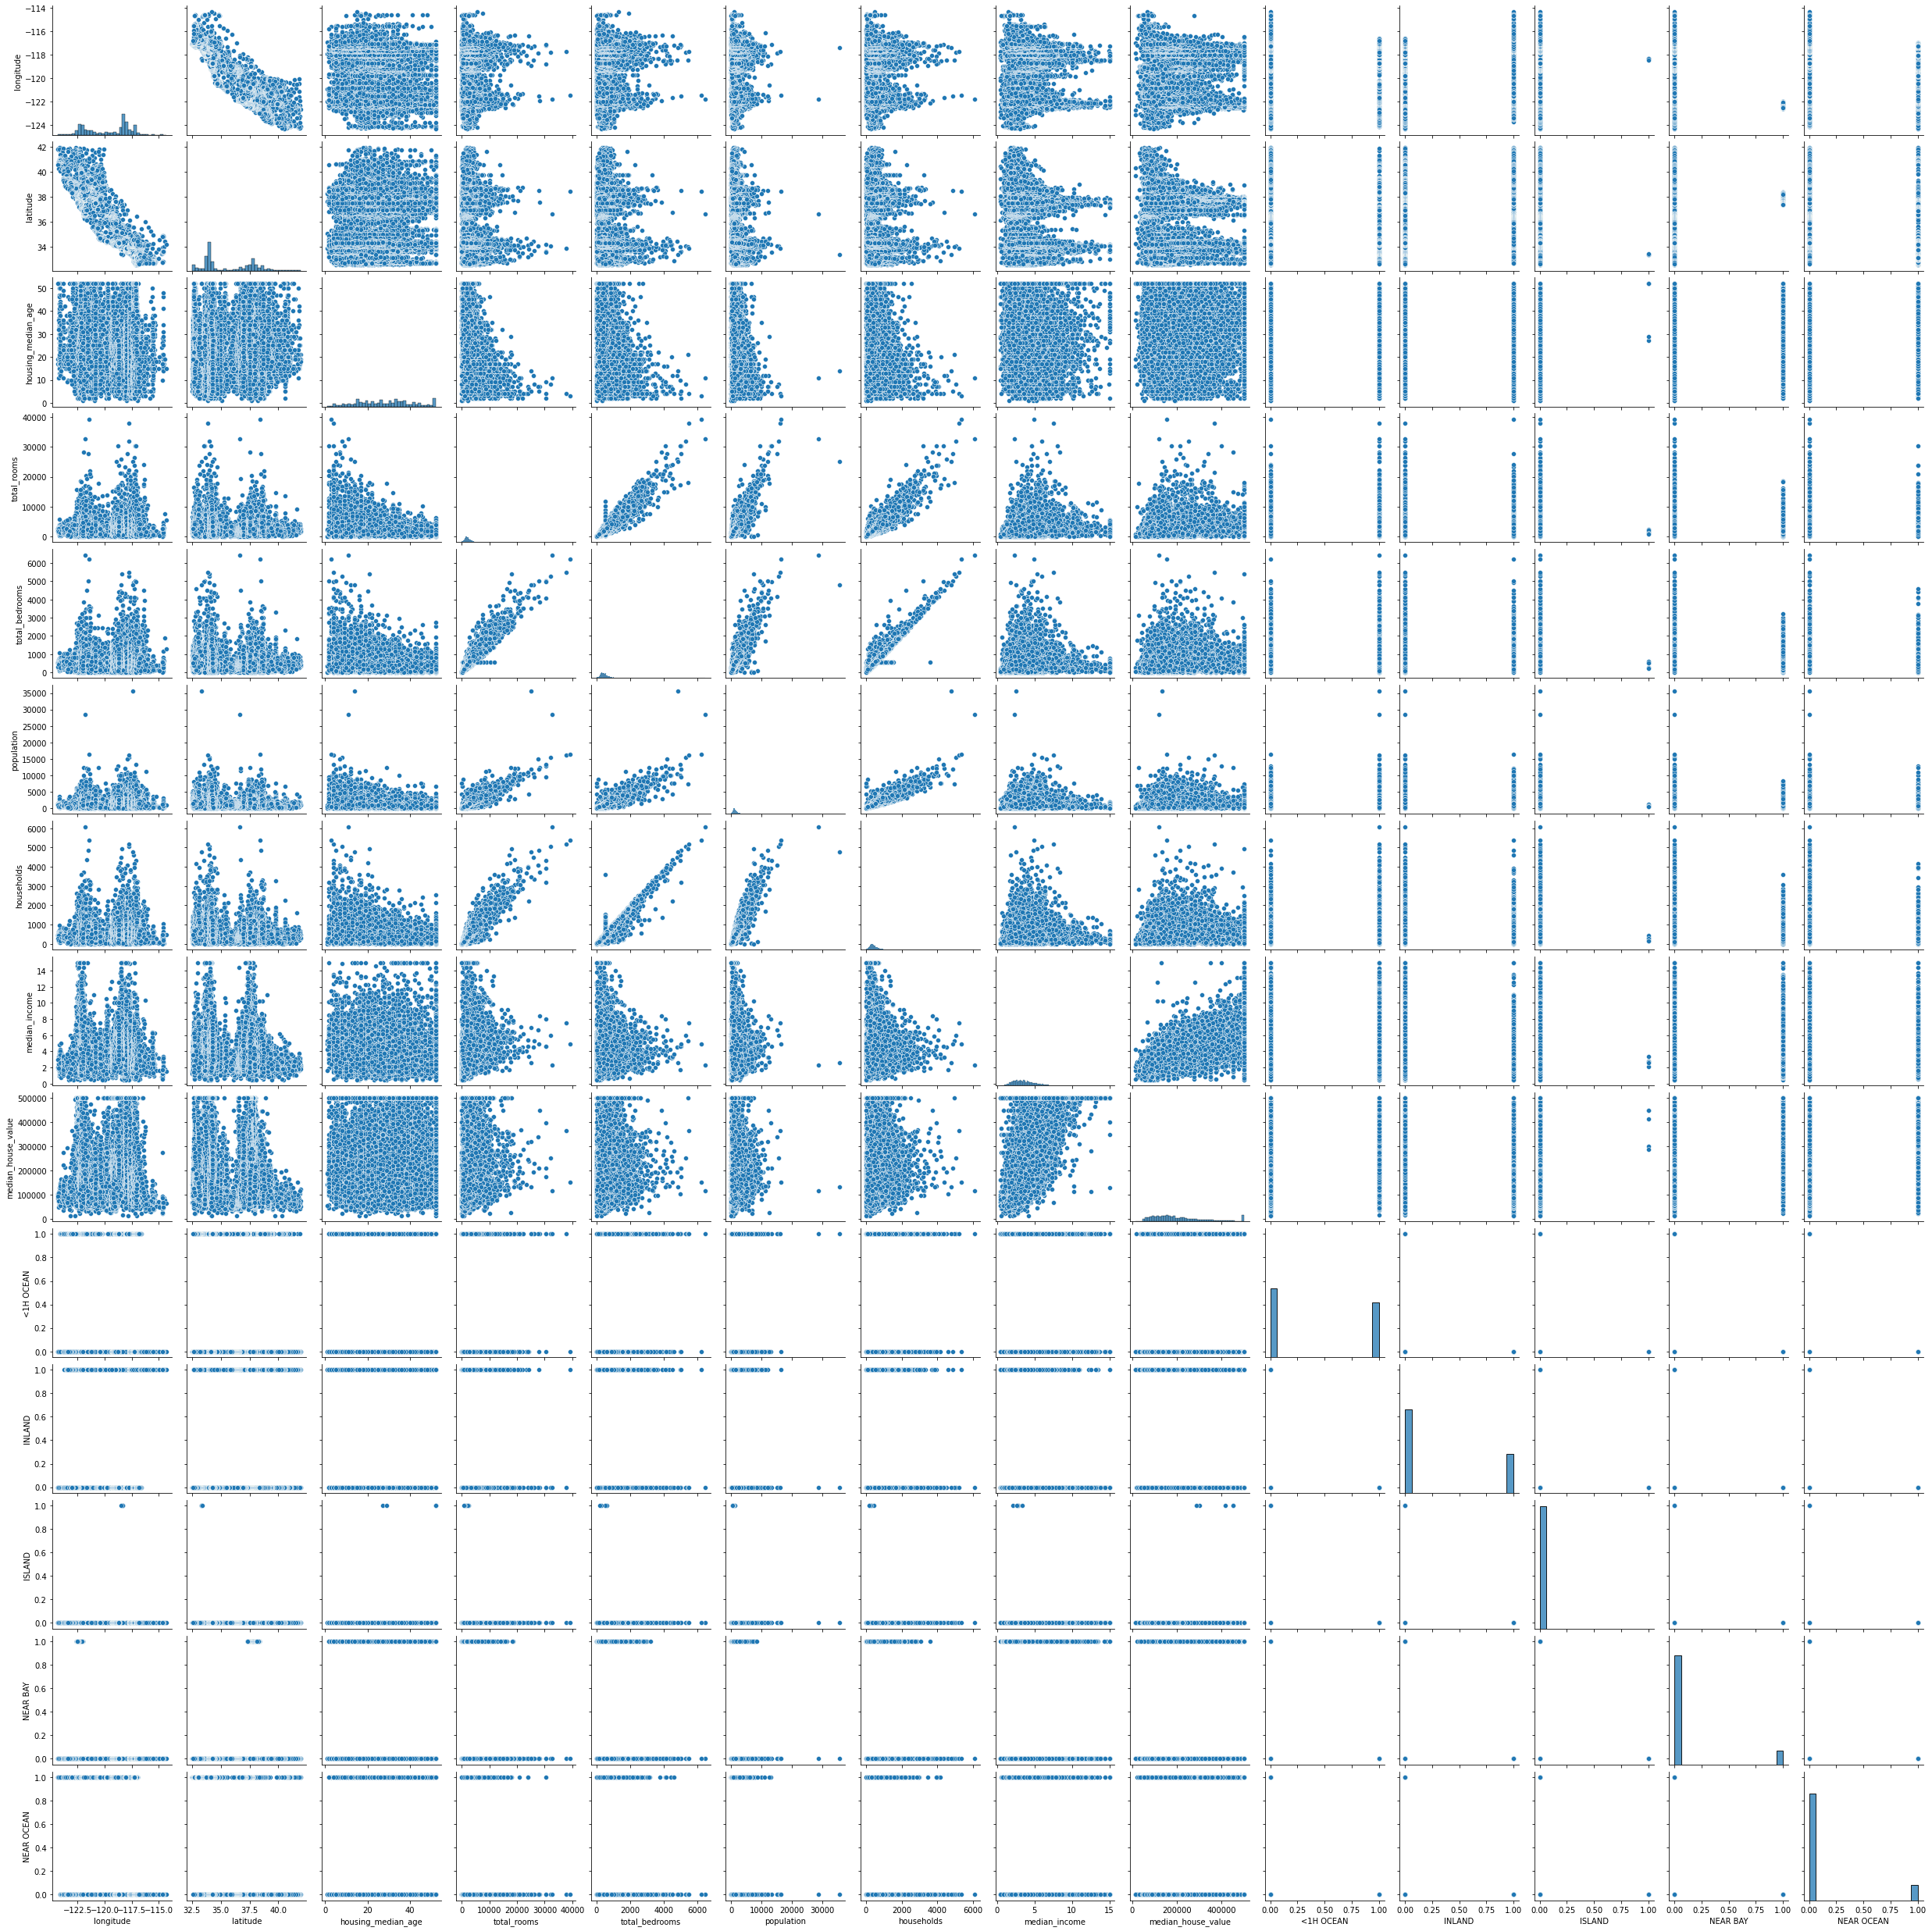

In [ ]:
sb.pairplot(housing)

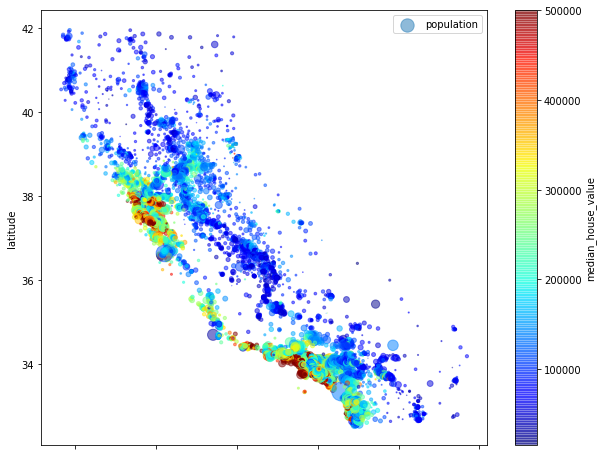

In [ ]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=.5,s=housing['population']/100,label='population',c='median_house_value',cmap='jet',colorbar=True,figsize=(10,8))

In [ ]:
y = housing['median_house_value']

In [ ]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [ ]:
x = housing.drop(columns = 'median_house_value') 

In [ ]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR_classifier = LinearRegression()

In [ ]:
LR_classifier.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
ypred = LR_classifier.predict(xtest)

In [ ]:
xtest 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
9443,-119.81,37.67,24.0,172.0,42.0,79.0,30.0,3.8333,0,1,0,0,0
3248,-119.82,36.19,33.0,1293.0,272.0,694.0,229.0,2.0221,0,1,0,0,0
18565,-121.74,36.92,17.0,2648.0,589.0,1193.0,540.0,2.4461,1,0,0,0,0
965,-121.88,37.68,23.0,2234.0,270.0,854.0,286.0,7.3330,0,1,0,0,0
9017,-118.75,34.10,34.0,2255.0,402.0,857.0,317.0,4.5333,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,-119.60,36.66,27.0,1388.0,296.0,1056.0,284.0,1.6094,0,1,0,0,0
14987,-117.03,32.73,32.0,1750.0,333.0,997.0,335.0,3.4784,0,0,0,0,1
10737,-117.91,33.61,40.0,2790.0,531.0,952.0,424.0,4.8000,1,0,0,0,0
1614,-122.09,37.86,27.0,5484.0,760.0,2212.0,770.0,7.6202,0,0,0,1,0


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

lin_mse = mean_squared_error(ytest, ypred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

70072.5217068178

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor



=> y is a target median_house_value and remaining columns considered to be x.
Using train_test_split method, 80% of data is used for training and the rest 20% is used for testing.

=> Then declaring a dictionary named 'models', this dictionary loaded with few regressor methods as a value and key for the respective values.

=>Each time when forloop is iterated the model.predict() function is called. For example KNeighbhorRegressor().predict() is called on first iteration and then LinearRegression().predict() is called on the second iteration and follows.

=>Finding accuracy score for all regressor methods in dictionary using forloop by passing keys and values 





In [ ]:
def housing_fit_model_prediction(data):
  y = data['median_house_value'] #housing['median_house_value']
  X = data.drop(columns="median_house_value") #housing.drop(columns = 'median_house_value')     
  #data[['median_income', 'INLAND','<1H OCEAN', 'NEAR BAY', 'latitude','NEAR OCEAN', 'total_rooms', 'housing_median_age', 'households']]
  
  x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 16)
  models = {"KNeighborsRegressor":KNeighborsRegressor(), "LinearRegression":LinearRegression(), 
              "DecisionTreeRegressor":DecisionTreeRegressor(), "LGBMRegressor":LGBMRegressor(n_estimators=1000),"RandomForestRegressor": RandomForestRegressor()}
  print("Models accuracy:")
  for key, model in models.items():
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print(f"{key}: {round(r2_score(y_test,y_pred)*100)}%")
    
housing_fit_model_prediction(housing)

Models accuracy:
KNeighborsRegressor: 27%
LinearRegression: 63%
DecisionTreeRegressor: 64%
LGBMRegressor: 85%
RandomForestRegressor: 83%


LGMregressor provide the maximum accuracy of 85%.